Which NYC schools have the best math results?

The best math results are at least 80% of the *maximum possible score of 800* for math.
Save your results in a pandas DataFrame called best_math_schools, including "school_name" and "average_math" columns, sorted by "average_math" in descending order.

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()


,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [120]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [121]:
schools.describe()

,average_math,average_reading,average_writing,percent_tested
count,375.000000,375.000000,375.000000,355.000000
mean,432.944000,424.504000,418.458667,64.976338
std,71.952373,61.881069,64.548599,18.747634
min,317.000000,302.000000,284.000000,18.500000
25%,386.000000,386.000000,382.000000,50.950000
50%,415.000000,413.000000,403.000000,64.800000
75%,458.500000,445.000000,437.500000,79.600000
max,754.000000,697.000000,693.000000,100.000000


A basic exploration of the schools DataFrame shows 375 rows, 8 columns, and no null values. The average math, reading, and writing scores are 432.94, 424.50, and 418.45, respectively. The max and min values for average math, reading, and writing scores do not show any values above or below what is expected for the test (the maximum possible score is 800). However, there is noticeable variability in the percentage tested between schools, with percentages as low as 18.5%, as high as 100%, and a median of 64.8%, which probably needs further investigation. 

Subsetting schools with at least 80% of the maximum possible score of 800 for math, that is 640.

In [124]:
math_score_over_80p = schools[schools["average_math"] >= 640]
print(math_score_over_80p)

                                           school_name        borough  \
0    New Explorations into Science, Technology and ...      Manhattan   
45                       Eleanor Roosevelt High School      Manhattan   
68   High School for Mathematics, Science, and Engi...      Manhattan   
88                              Stuyvesant High School      Manhattan   
93                 Staten Island Technical High School  Staten Island   
170                       Bronx High School of Science          Bronx   
174  High School of American Studies at Lehman College          Bronx   
280                     Brooklyn Technical High School       Brooklyn   
333                        Townsend Harris High School         Queens   
365  Queens High School for the Sciences at York Co...         Queens   

    building_code  average_math  average_reading  average_writing  \
0            M022           657              601              601   
45           M855           641              617          

Creating a data frame with school_name and average_math for schools with scores at least 80% of the maximum possible score, and sorting the data frame by average_math

In [126]:
best_math_schools = math_score_over_80p[["school_name", "average_math"]].sort_values("average_math", ascending = False)
print(best_math_schools)

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641


What are the top 10 performing schools based on the combined SAT scores?

Save your results as a pandas DataFrame called top_10_schools containing the "school_name" and a new column named "total_SAT", with results ordered by "total_SAT" in descending order ("total_SAT" being the sum of math, reading, and writing scores).

Adding a new column with total_SAT with the sum of the averages for math, reading and writing

In [129]:
schools["total_SAT"] = schools[["average_math", "average_reading", "average_writing"]].sum(axis=1)
print(schools)

                                           school_name    borough  \
0    New Explorations into Science, Technology and ...  Manhattan   
1                                 Essex Street Academy  Manhattan   
2                         Lower Manhattan Arts Academy  Manhattan   
3      High School for Dual Language and Asian Studies  Manhattan   
4        Henry Street School for International Studies  Manhattan   
..                                                 ...        ...   
370  Queens High School for Information, Research, ...     Queens   
371  Rockaway Park High School for Environmental Su...     Queens   
372                   Channel View School for Research     Queens   
373                    Rockaway Collegiate High School     Queens   
374                                  Scholars' Academy     Queens   

    building_code  average_math  average_reading  average_writing  \
0            M022           657              601              601   
1            M445           395  

In [130]:
print(schools.columns)

Index(['school_name', 'borough', 'building_code', 'average_math',
       'average_reading', 'average_writing', 'percent_tested', 'total_SAT'],
      dtype='object')


In [131]:
top_10_schools = schools[["school_name", "total_SAT"]].sort_values("total_SAT", ascending = False).head(10)
print(top_10_schools)

                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


Which single borough has the largest standard deviation in the combined SAT score?

Save your results as a pandas DataFrame called largest_std_dev.
The DataFrame should contain one row, with:
"borough" - the name of the NYC borough with the largest standard deviation of "total_SAT".
"num_schools" - the number of schools in the borough.
"average_SAT" - the mean of "total_SAT".
"std_SAT" - the standard deviation of "total_SAT".
Round all numeric values to two decimal places.

In [133]:
schools_total_SAT_mean_std = schools.groupby("borough")[["total_SAT"]].agg(["count", "mean", "std"]).round(2)
print(schools_total_SAT_mean_std)
print(schools_total_SAT_mean_std.columns)
print(type(schools_total_SAT_mean_std))

              total_SAT                 
                  count     mean     std
borough                                 
Bronx                98  1202.72  150.39
Brooklyn            109  1230.26  154.87
Manhattan            89  1340.13  230.29
Queens               69  1345.48  195.25
Staten Island        10  1439.00  222.30
MultiIndex([('total_SAT', 'count'),
            ('total_SAT',  'mean'),
            ('total_SAT',   'std')],
           )
<class 'pandas.core.frame.DataFrame'>


The groupby and agg functions worked great. However, the DataFrame I got has a MultiIndex on the columns because of the agg function. According to Pandas documentation, if the DataFrame has a MultiIndex, the .reset_index() method can remove one or more levels. Nevertheless, I didn't get exactly the result that I needed, so I decided to use a different approach:

In [135]:
schools_total_SAT_mean_std.columns = ['_'.join(col).strip() for col in schools_total_SAT_mean_std.columns.values]
print(schools_total_SAT_mean_std)

               total_SAT_count  total_SAT_mean  total_SAT_std
borough                                                      
Bronx                       98         1202.72         150.39
Brooklyn                   109         1230.26         154.87
Manhattan                   89         1340.13         230.29
Queens                      69         1345.48         195.25
Staten Island               10         1439.00         222.30


This line takes the MultiIndex columns of the DataFrame and flattens them into a single-level list of column names, making them easier to work with. Step-by-step explanation:
1. schools_total_SAT_mean_std.columns: This accesses the column names of the DataFrame, which are in a MultiIndex format after the agg function.
2. schools_total_SAT_mean_std.columns.values: This retrieves the actual column names as an array of tuples (because it's a MultiIndex). For example, ("total_SAT", "mean") and ("total_SAT", "std").
3. List comprehension:
* for col in schools_total_SAT_mean_std.columns.values: loops through each column name, where col is a tuple like ("total_SAT", "mean").
* '_'.join(col): This takes each tuple (e.g., ("total_SAT", "mean")) and joins the parts using an underscore _. So, the tuple becomes "total_SAT_mean". This is why it flattens the columns.
.strip(): This removes any leading or trailing whitespace that might exist (though in most cases there won’t be any, but it's a good practice to ensure cleanliness).

Now, I can rename the columns:

In [137]:
schools_total_SAT_mean_std = schools_total_SAT_mean_std.rename(columns={
    "borough": "borough",
    "total_SAT_count": "num_schools",
    "total_SAT_mean": "average_SAT",
    "total_SAT_std": "std_SAT"
})
print(schools_total_SAT_mean_std)

               num_schools  average_SAT  std_SAT
borough                                         
Bronx                   98      1202.72   150.39
Brooklyn               109      1230.26   154.87
Manhattan               89      1340.13   230.29
Queens                  69      1345.48   195.25
Staten Island           10      1439.00   222.30


A bar chart can illustrate the average and standard deviation of combined SAT scores by borough:
We can see that Manhattan and Staten Island have the largest standard deviations, whereas Staten Island and Queens have the highest combined average SAT scores. 

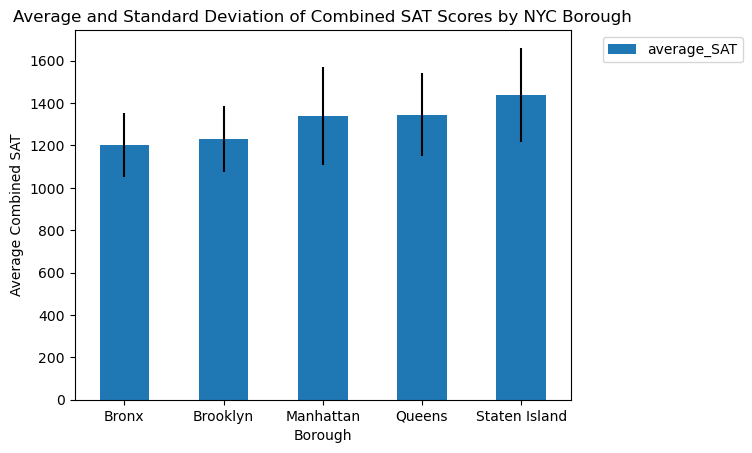

In [155]:
graph_1_df = schools_total_SAT_mean_std.reset_index(drop = False)
graph_1_df.plot(kind='bar', x="borough", y='average_SAT', yerr='std_SAT', rot=0, title="Average and Standard Deviation of Combined SAT Scores by NYC Borough")
plt.xlabel("Borough")
plt.ylabel("Average Combined SAT")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


To answer the question, the borough that has the largest standard deviation in the combined SAT score is:

In [157]:
largest_std_dev = schools_total_SAT_mean_std.sort_values("std_SAT", ascending = False).head(1)
print(largest_std_dev)

           num_schools  average_SAT  std_SAT
borough                                     
Manhattan           89      1340.13   230.29
